# Pipeline and Summary

> __To proceed__:
* Import selected Features and Target
* Build a scaled pipeline
* Add tuned models to pipeline
* Test, tune, and score models
* Compare the model scores to determine which model is most effective

### Import Data

In [2]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from pickle file
# The protocol version used is detected automatically, so we do not
# have to specify it.
with open('data/df-os.pickle', 'rb') as f:
    df_2 = pickle.load(f)

# viewing original dataframe shape
display(df_2.shape)

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [ ]:
# using our step - forward selected features
X_feat = df_2.iloc[:, feat_cols]

X_feat.head(0)

In [ ]:
X = X_feat # features
y = df_2['Shares_plus'] # target

In [ ]:
def save_model(model, directory='./models'):
    """
    creates a file name by appending .pickle' to a model's variable name,
    and saves the model as a pickle file in the working directory's
    'model' subdirectory
    """
    # verify or create the save - path directory
    if not os.path.exists(directory):
        os.mkdir(directory)

    # build the file name
    f_name = [tuple[0] for tuple in filter(
        lambda x: model is x[1],
        globals().items())
             ][0]

    # pickle the model with the created filename
    with open(f'{directory}/{f_name}.pickle', 'wb') as f:
        # pickling the dataframe using the highest protocol available
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    return print(f'Saved to {directory} as pickle file: {f_name}\n', '-'*50)


def save_models(models):
    """
    passes a list of model names and saves
    the models as separate pickle files
    """
    for m in models:
        saved_model = save_model(m)
    return saved_model

> __To proceed__:
* Build a Machine Learhing pipeline
* Fit models to the pipeline
* Score and compare models
* Analyze results

In addition, depending on time allowance and feature relative importance, I may repeat tests without features such as best and worst keywords, LDA, and polarity, as they may require additional unpacking beyond our current scope.

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [43]:
# get names of pickled model files from os
sub = './models'
models = [f for f in os.walk(sub)][0][2]
print(models)

['rf_grid_search.pickle', 'tree_clf.pickle', '_.pickle', '___.pickle']


In [ ]:
for i in len(models):
    for m in models:
        with open(m, 'rb') as f:
        tree_clf = pickle.load(f)

In [4]:
with open('tree_clf.pickle', 'rb') as f:
    tree_clf = pickle.load(f)

with open('bagged_tree.pickle', 'rb') as f:
    bagged_tree = pickle.load(f)

with open('rf_clf.pickle', 'rb') as f:
    rf_clf = pickle.load(f)

with open('rf_grid_search.pickle', 'rb') as f:
    rf_grid_search = pickle.load(f)

In [14]:
print("\n", tree_clf, "\n", "-"*50,  
      "\n", bagged_tree, "\n", "-"*50,  
      "\n", rf_clf, "\n", "-"*50,  
      "\n", rf_grid_search
     )


 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 
 -------------------------------------------------- 
 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
          

### Plot Class Counts

## Build a Pipeline

#### Import Required Libraries

In [5]:
from 
from 
from 
from 

In [ ]:
df_3 = pd.DataFrame(df_2.columns)

In [18]:
pd.set_option("display.max_rows", 100)
df_3[0]

0                    timedelta
1                      n_title
2                    n_content
3              n_unique_tokens
4             n_non_stop_words
5     n_non_stop_unique_tokens
6                       nhrefs
7                  nself_hrefs
8                        nimgs
9                      nvideos
10            avg_token_length
11                   nkeywords
12           channel_lifestyle
13                 channel_ent
14                 channel_bus
15              channel_socmed
16                channel_tech
17               channel_world
18                  kw_min_min
19                  kw_max_min
20                  kw_avg_min
21                  kw_min_max
22                  kw_max_max
23                  kw_avg_max
24                  kw_min_avg
25                  kw_max_avg
26                  kw_avg_avg
27         self_ref_min_shares
28         self_ref_max_shares
29         self_ref_avg_shares
30                    week_mon
31                   week_tues
32      

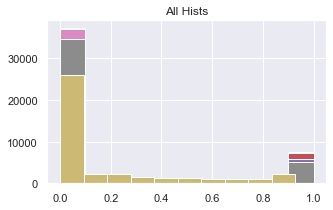

In [51]:
plt.figure(figsize = (5,3))
for col in df_2.columns[30:39]:
    plt.hist(df_2[col], histtype='bar', label=col)

plt.title('All Hists')
plt.show()

In [16]:
plt.hist(df_2,nrows=12,ncols=5)

NameError: name 'df_2' is not defined

In [8]:
# 72 Char. screen - width reference
########################################################################

## Save and Continue

In [9]:
with open('data/#.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(#, f, pickle.HIGHEST_PROTOCOL)

SyntaxError: unexpected EOF while parsing (<ipython-input-9-5b158aa6479f>, line 3)